In [4]:
!pip install pydub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!pip install mutagen

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 KB 5.5 MB/s eta 0:00:00


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
import pandas as pd
import numpy as np
import glob
import mutagen
from pydub import AudioSegment
from matplotlib import pyplot as plt
from mutagen.wave import WAVE
import sys
import librosa
from scipy.io import wavfile
import librosa.display
import os

In [8]:
import zipfile
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/dsl_data.zip', 'r') 
zip_ref.extractall('/tmp')
zip_ref.close()

In [9]:
import pandas as pd
df= pd.read_csv('/tmp/development.csv')
df.shape

(9854, 10)

In [10]:
df['audio_name'] = df['path'].apply(lambda x: x.split('/')[-1].split('.')[0])
df.drop('path', inplace=True, axis=1)
df.shape

(9854, 10)

In [11]:
def merge(a, b):
  c= str(a) + str(b)
  return c
df['label']= df.apply(lambda row : merge(row['action'], row['object']), axis = 1)

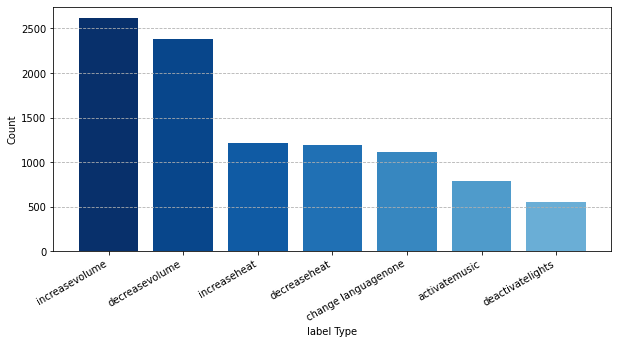

In [12]:
xx= df['label'].value_counts().reset_index()
x= xx.loc[:]['index']
y= xx.loc[:]['label']
  
fig = plt.figure(figsize = (10, 5))
plt.xticks(rotation='vertical')
# plt.bar(x, y)
plt.bar(x, y, color=plt.cm.Blues(np.linspace(1., 0.5, len(x))))
plt.gcf().autofmt_xdate()

plt.xlabel("label Type")
plt.ylabel("Count")
plt.grid(linestyle='--', axis= 'y')
# plt.title("Students enrolled in different courses")
plt.savefig("myImage.png", format="png", dpi= 1200)
plt.show()

In [13]:
import pandas as pd
dev= pd.read_csv('/tmp/development.csv')
dev.shape

(9854, 10)

In [16]:
import pandas as pd
val= pd.read_csv('/tmp/evaluation.csv')
val.shape

(1455, 8)

In [17]:
df= pd.concat([dev, val], axis= 0)
df.shape

(11309, 10)

In [18]:
df['audio_name'] = df['path'].apply(lambda x: x.split('/')[-1].split('.')[0])
df.drop('path', inplace=True, axis=1)
df.shape

(11309, 10)

In [19]:
def merge(a, b):
  c= str(a) + str(b)
  return c
df['label']= df.apply(lambda row : merge(row['action'], row['object']), axis = 1)

In [20]:
import glob
pathtrain =[]
pathtest =[]
path_nonzero = []
for file in glob.glob('/tmp/audio/speakers/*'):
  for i in glob.glob(file + '/*.wav'):
    id= i.split('/')[-1].split('.')[0]
    if (list(df['action'][df['audio_name']== id].isna())[0]): 
      pathtest.append(i)
    else:
      pathtrain.append(i)

print(len(pathtrain),len(pathtest))

9854 1455


In [21]:
###### length
dic= {}
for i in pathtrain:
      id= i.split('/')[-1].split('.')[0]
      audio = WAVE(i)
      length = int(audio.info.length)
      dic[id]= length
data= pd.DataFrame(dic.values(), index= dic.keys(), columns= {'length'})
data['audio_name']= dic.keys()

In [22]:
df= pd.merge(df, data, on= ['audio_name'])
df.shape

(9854, 12)

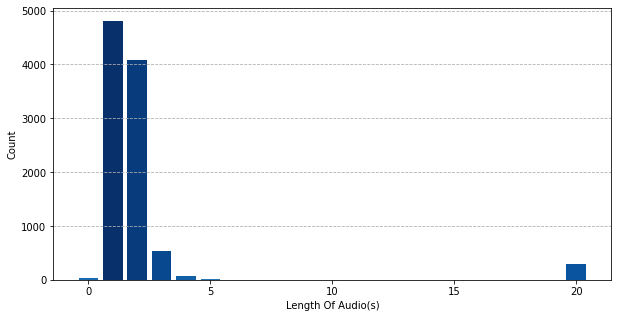

In [23]:
#####duration of audios
xx= df['length'].value_counts().reset_index()
x= xx.loc[:]['index']
y= xx.loc[:]['length']
  
fig = plt.figure(figsize = (10, 5))
plt.bar(x, y, color=plt.cm.Blues
        (np.linspace(1., 0.5, len(x))))
 
plt.xlabel("Length Of Audio(s)")
plt.ylabel("Count")
plt.grid(linestyle='--', axis= 'y')
plt.savefig("myImage.png", format="png", dpi= 1200)
plt.show()

In [26]:
###### check sr of all audios
sr= []
for i in pathtrain:
  a, b = librosa.load(i)
  s= b / 1000
  sr.append(s)

In [27]:
len(sr)

9854

In [28]:
import numpy as np
print(np.min(sr), np.max(sr), np.mean(sr))

22.05 22.05 22.050000000000008


In [29]:
set(sr)

{22.05}

In [89]:
#### an example of audios
path= '/tmp/audio/speakers/W7LeKXje7QhZlLKe/3c71a140-4554-11e9-aa52-bf2189a03a60.wav'

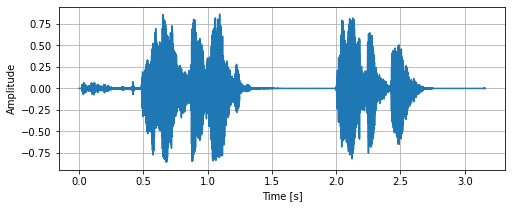

In [92]:
#####visualize an random audio in time domain
data, sr = librosa.load(path)

duration = len(data)/sr
time = np.arange(0, duration,1/sr) 
fig = plt.figure(figsize = (8, 3))
plt.plot(time,data)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()
plt.savefig('length.png')
plt.savefig("time.png", format="png", dpi= 1200)
plt.show()

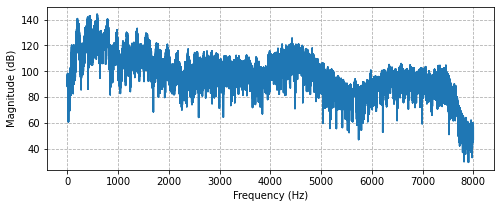

In [94]:
#####visualize an random audio in frequency domain
samplerate, audio = wavfile.read(path)

fft = np.fft.fft(audio)
magnitude = np.abs(fft)
magnitude_dB = 20 * np.log10(magnitude)
frequencies = np.abs(np.fft.fftfreq(audio.size, 1/samplerate))
fig = plt.figure(figsize = (8, 3))
plt.plot(frequencies, magnitude_dB)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.grid(linestyle='--')
plt.savefig("frequency.png", format="png", dpi= 1200)
plt.show()

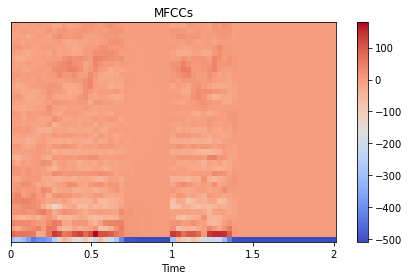

In [105]:
######MFCC for a random audio
y, sr = librosa.load(path, sr= 16000, offset=0.0, duration=4.0)
current_length = len(y)
padding = int(4 * sr) - current_length
y_pad = np.pad(y, (0, padding), mode='constant')
mfccs = librosa.feature.mfcc(y= y_pad, sr= sr, n_fft= 2048, hop_length= 1024, n_mfcc= 40)

librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.colorbar()
plt.title('MFCCs')
plt.tight_layout()
plt.savefig("mfcc.png", format="png", dpi= 1200)
plt.show()

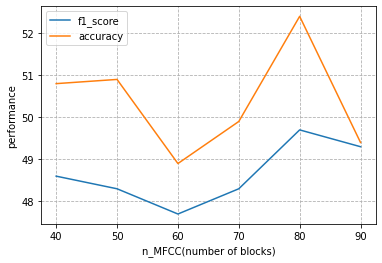

In [35]:
######number of MFCC
x = [40, 50, 60, 70, 80, 90]
f1 = [48.6, 48.3, 47.7, 48.3, 49.7, 49.3]
acc= [50.8, 50.9, 48.9, 49.9, 52.4, 49.4]

plt.plot(x, f1)
plt.plot(x, acc)
plt.ylabel('performance')
plt.xlabel('n_MFCC(number of blocks)')
plt.legend(['f1_score', 'accuracy'], loc='upper left')
plt.grid(linestyle='--')
plt.savefig("n_MFCC.png", format="png", dpi= 1200)
plt.show()